### Diffusion equation
Using two FTCS schemes (compact and non-compact), test the accuracy of each one on the diffusion equation

In [18]:
# Function defining the initial and analytic solution
def initialBell(x):
    return np.float64(np.where(x%1. < 0.5, np.power(np.sin(2*x*np.pi), 2), 0))

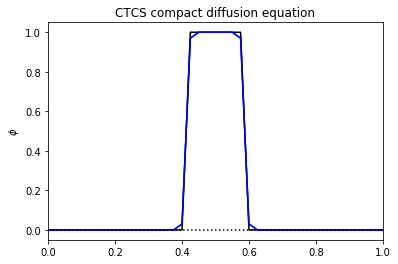

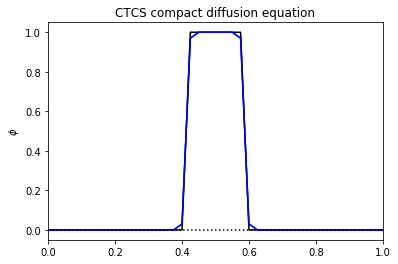

In [16]:

#plot the diffusion equation using the FTCS update scheme
def plot_diffusion(nt):   
    # Setup space, initial phi profile and Courant number
    nx = 40                 # number of points in space
    #nt = 250                 # number of time steps
    eta =  0.03 # dimensionless constant that sets the rate of diffusion


    # Spatial variable going from zero to one inclusive
    x = np.linspace(0.0, 1.0, nx+1)
    line, = ax.plot(x, initialBell(x))
    
    # Three time levels of the dependent variable, phi
    phi = squareHat(x)
    phiNew = phi.copy()
    phiOld = phi.copy()

    # FTCS for the first time-step, looping over space
    for j in range(1,nx):
        phi[j] = phiOld[j] + eta*(phiOld[j+1] - 2*phiOld[j] + phiOld[j-1])

    # apply periodic boundary conditions
    phi[0] = phiOld[0] +  eta*(phiOld[1] - 2*phiOld[0] + phiOld[nx-1])
    phi[nx] = phi[0]

    # Loop over remaining time-steps (nt) using CTCS
    for n in range(1,nt):
        # loop over space
        for j in range(1,nx):
            phiNew[j] = phiOld[j] + eta*(phiOld[j+1] - 2*phiOld[j] + phiOld[j-1])
        # apply periodic boundary conditions
        phiNew[0] = phiOld[0] + eta*(phiOld[1] - 2*phiOld[0] + phiOld[nx-1])
        phiNew[nx] = phiNew[0]
        #update phi for the next time-step
        phiOld = phi.copy()
        phi = phiNew.copy()

    plt.plot(x, squareHat(x), 'k', label='Initial condition')

    # Plot the solution in comparison to the analytic solution
    #plt.plot(x, initialBell(x - u*t), 'r', label='analytic solution')
    plt.plot(x, phi, 'b', label='CTCS')
    #plt.legend(loc='best')
    #plt.ylabel('$\phi$')
    plt.axhline(0, linestyle=':', color='black')
    line.set_ydata(phi)  # update the data    
    plt.show()
    return line,
fig, ax = plt.subplots()
# initialization function: plot the background of each frame
#def init():
#    line.set_data([], [])
#    return (line,)

ani = animation.FuncAnimation(fig, plot_diffusion, np.arange(1, 10000, 250),# init_func=init,
                              interval=250)

ax.set_title("CTCS compact diffusion equation")
ax.set_ylabel('$\phi$')
ax.set_xlim(0,1)
plt.show()


In [56]:
r

1.25

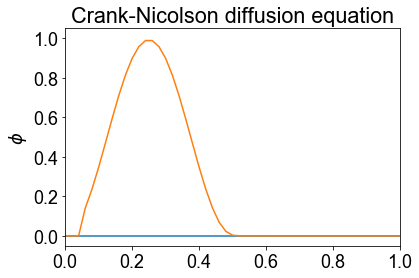

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import matplotlib

matplotlib.rc('font', size=18)
matplotlib.rc('font', family='Arial')

#definition of numerical parameters
N = 51 #number of grid points
dt = 5.e-4 #time step
L = float(1) #size of grid
nsteps = 50 #number of time steps
dx = L/(N-1) #grid spacing
nplot = 20 #number of timesteps before plotting

r = 0.25#dt/dx**2 #assuming heat diffusion coefficient == 1

#initialize matrices A, B and b array
A = np.zeros((N-2,N-2))
B = np.zeros((N-2,N-2))
b = np.zeros((N-2))
#define matrices A, B and b array
for i in range(N-2):
    if i==0:
        A[i,:] = [2+2*r if j==0 else (-r) if j==1 else 0 for j in range(N-2)]
        B[i,:] = [2-2*r if j==0 else r if j==1 else 0 for j in range(N-2)]
        #b[i] = 0. #boundary condition at i=1
    elif i==N-3:
        A[i,:] = [-r if j==N-4 else 2+2*r if j==N-3 else 0 for j in range(N-2)]
        B[i,:] = [r if j==N-4 else 2-2*r if j==N-3 else 0 for j in range(N-2)]
        #b[i] = 0. #boundary condition at i=N
    else:
        A[i,:] = [-r if j==i-1 or j==i+1 else 2+2*r if j==i else 0 for j in range(N-2)]
        B[i,:] = [r if j==i-1 or j==i+1 else 2-2*r if j==i else 0 for j in range(N-2)]

#initialize grid
u = np.linspace(0,1,N)
#initial condition
#initialBell(u)


#fig = plt.figure()
#plt.plot(x,u,linewidth=2)
#plt.show()

#filename = 'foo000.jpg';
#fig.set_tight_layout(True);
#plt.xlabel("x")
#plt.ylabel("u")
#plt.title("t = 0")
#plt.savefig(filename)
#plt.clf()

def plot_diff_CN(nsteps):
    c = 0
    u = initialBell(x)
    line, = ax.plot(x, u)
    #b = initialBell(u)
    #evaluate right hand side at t=0
    bb = B.dot(u[1:-1]) + b   
    for j in range(nsteps):    
        
        #find solution inside domain
        uOld = u.copy()   
        #b[0] = u[0]
        #b[-1] = b[0]
        u[1:-1] = np.linalg.solve(A,bb)        
        #boundary conditions
        bc = 0#(1 / (2*(1+r)))*(r*(u[1] + u[-2]) + r*uOld[1] + 2*(1-r)*uOld[0] + r*uOld[-1])
        #print(f"bc = {bc}")
        u[0] = (1 / (2*(1+r)))*(r*(u[1] + u[-2]) + r*uOld[1] + 2*(1-r)*uOld[0] + r*uOld[-1])
        u[-1] = (1 / (2*(1+r)))*(r*(u[1] + u[-2]) + r*uOld[1] + 2*(1-r)*uOld[0] + r*uOld[-1])#u[0]
        b[0] = (1 / (2*(1+r)))*(r*(u[1] + u[-2]) + r*uOld[1] + 2*(1-r)*uOld[0] + r*uOld[-1])#u[0]
        b[-1] = (1 / (2*(1+r)))*(r*(u[1] + u[-2]) + r*uOld[1] + 2*(1-r)*uOld[0] + r*uOld[-1])#b[0]
        u[2] = bc
        u[1] = bc
        u[0] = bc
        u[-1] = bc
        u[-2] = bc
        #update right hand side
        bb = B.dot(u[1:-1]) + b    
    

                   
        #print(j)



        #bb = B.dot(u[1:-1]) #+ b
        line.set_ydata(u)  # update the data         
#         #update right hand side
#         #bb = B.dot(u[1:-1]) #+ b
#         if(j%nplot==0): #plot results every nplot timesteps
#             plt.plot(x,u,linewidth=2)
#             plt.ylim([0,1])
#             #filename = 'foo' + str(c+1).zfill(3) + '.jpg';
#             plt.xlabel("x")
#             plt.ylabel("u")
#             plt.title("t = %2.2f"%(dt*(j+1)))
#             #plt.savefig(filename)

#             plt.clf()
#             plt.show()
#         c += 1
    return line,

#    line.set_ydata(phi)  # update the data       
fig, ax = plt.subplots()

ax.plot(range(len(u)), squareHat(u))

ani = animation.FuncAnimation(fig, plot_diff_CN, np.arange(1, 500, 10),# init_func=init,
                              interval=250)    
    
ax.set_title("Crank-Nicolson diffusion equation")
ax.set_ylabel('$\phi$')
ax.set_xlim(0,1)
plt.show()    
    
#u = plot_diff_CN(10)
#plt.plot(range(len(u)),u)    
#os.system("ffmpeg -y -i 'foo%03d.jpg' heat_equation.m4v")
#os.system("rm -f *.jpg")

bc = 0.017827514776928257
bc = 0.032323387766691865
bc = 0.04245267292149439
bc = 0.05062008800973071
bc = 0.05694431056914243
bc = 0.06190945526890333
bc = 0.06577173797392158
bc = 0.06875724602086504
bc = 0.0710288944770782
bc = 0.07271752302577052
bc = 0.07392569062933528
bc = 0.07473638154466945
bc = 0.07521700396290387
bc = 0.07542305695978758
bc = 0.07540053649710533
bc = 0.07518784791634064
bc = 0.07481722384245507
bc = 0.0743158398745507
bc = 0.0737066867712258
bc = 0.07300926861132734
bc = 0.07224016536900024
bc = 0.07141349203383579
bc = 0.07054127621313624
bc = 0.06963377127632858
bc = 0.06869971771253397
bc = 0.06774656255319955
bc = 0.06678064449479974
bc = 0.06580735076090119
bc = 0.06483125051283303
bc = 0.06385620868496703
bc = 0.06288548339273821
bc = 0.0619218094918072
bc = 0.060967470414260094
bc = 0.06002436004564804
bc = 0.05909403611410983
bc = 0.058177766324741385
bc = 0.05727656827724313
bc = 0.05639124404397794
bc = 0.055522410152167086
bc = 0.05467052360280069

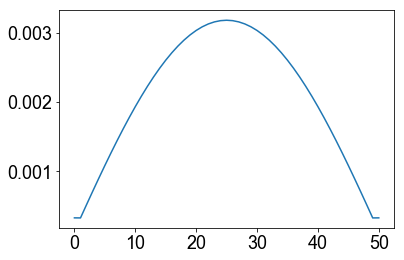

In [182]:
uplt = plot_diff_CN(1000)
plt.plot(range(len(uplt)),uplt)  


In [203]:
HTML(ani.to_html5_video())

In [38]:
#plot the diffusion equation using the Crank-Nicolson update scheme
def plot_diffusion_CN(nsteps):   
    # Setup space, initial phi profile and Courant number
    nx = 39                 # number of points in space
    #nt = 250                 # number of time steps
    eta =  0.03 # dimensionless constant that sets the rate of diffusion

    # Spatial variable going from zero to one inclusive
    x = np.linspace(0.0, 1.0, nx+1)
    line, = ax.plot(x, initialBell(x))    
    phi = initialBell(x)

    u = initialBell(x)#np.asarray([2*xx if xx<=0.5 else 2*(1-xx) for xx in x])
    #evaluate right hand side at t=0
    bb = B.dot(phi[1:-1]) #+ b    
    
    c = 0
    for j in range(nsteps):
        #print(j)
        #find solution inside domain
        phi[1:-1] = np.linalg.solve(A,bb)
        #update right hand side
        bb = B.dot(u[1:-1]) #+ b
        if(j%nplot==0): #plot results every nplot timesteps
            plt.plot(x,phi,linewidth=2)
            plt.ylim([0,1])
            filename = 'foo' + str(c+1).zfill(3) + '.jpg';
            plt.xlabel("x")
            plt.ylabel("$/phi$")
            plt.title("t = %2.2f"%(dt*(j+1)))
            plt.savefig(filename)
            plt.clf()
        c += 1
        
    #plt.plot(x, squareHat(x), 'k', label='Initial condition')

    # Plot the solution in comparison to the analytic solution
    #plt.plot(x, initialBell(x - u*t), 'r', label='analytic solution')
    #plt.plot(x, phi, 'b', label='CTCS')
    #plt.legend(loc='best')
    #plt.ylabel('$\phi$')
    plt.axhline(0, linestyle=':', color='black')
    line.set_ydata(phi)  # update the data    
    plt.show()
    return line,

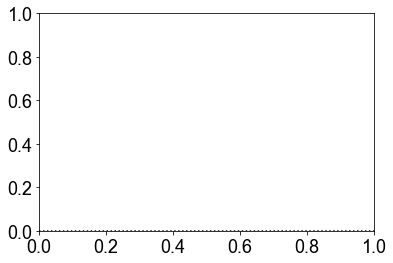

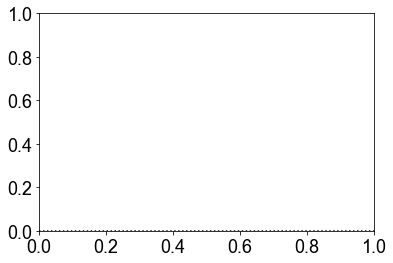

In [39]:
fig, ax = plt.subplots()

ani = animation.FuncAnimation(fig, plot_diffusion_CN, np.arange(1, 10, 1),# init_func=init,
                              interval=250)

ax.set_title("Crank-Nicolson diffusion equation")
ax.set_ylabel('$\phi$')
ax.set_xlim(0,1)
plt.show()

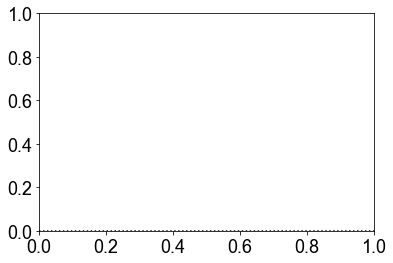

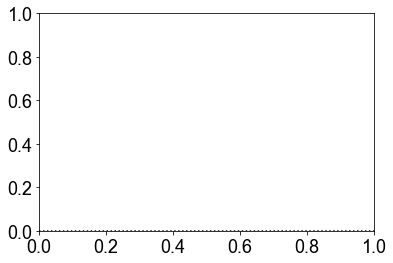

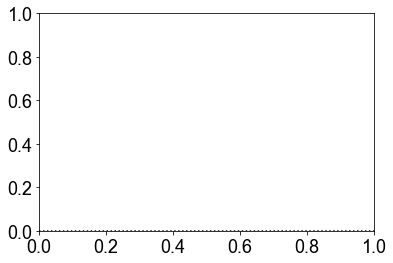

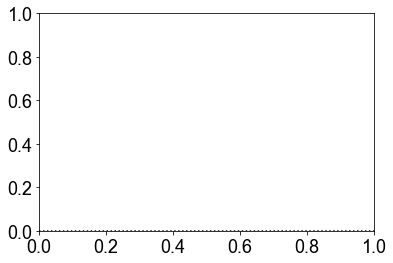

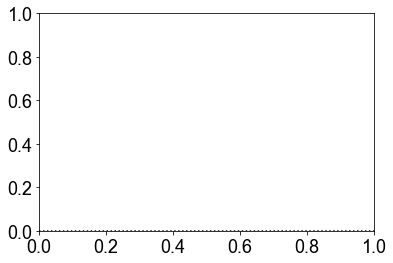

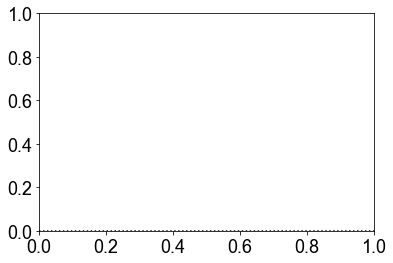

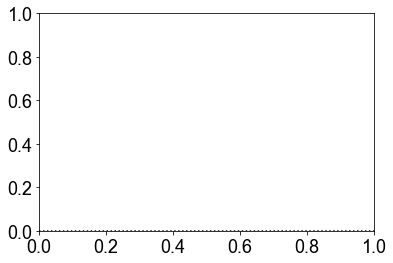

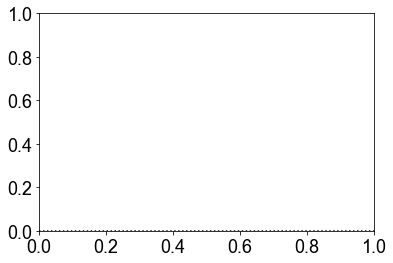

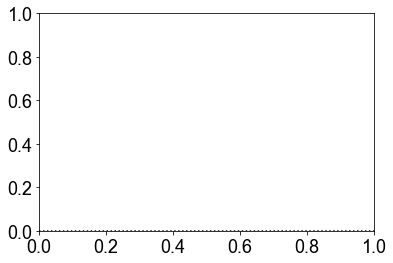

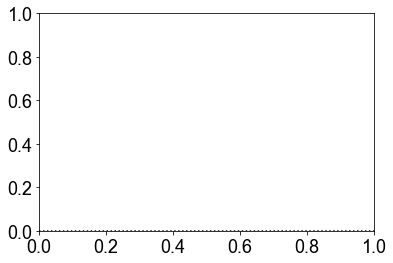

In [40]:
HTML(ani.to_html5_video())

In [2]:
import numpy as np      # External library for numerical calculations
import matplotlib.pyplot as plt   # Plotting library
import matplotlib.animation as animation # Plotting animation
from IPython.display import HTML # to save the animation
%matplotlib inline

In [11]:
# Function defining the square hat with bounds
def squareHat(x):
    low_bnd = 0.4
    hi_bnd = 0.6
    arr = np.zeros((len(x)))
    for i, val in enumerate(x):
        if low_bnd < val < hi_bnd:
            arr[i] = 1
        else:
            arr[i] = 0
    return arr

In [27]:
K = 4
dx = 1/40
dt = 1/500

K*dt/(dx**2)

0.03*(dx**2)/(dt)

0.009375000000000001

In [97]:
nx = 40                 # number of points in space
nt = 500                 # number of time steps
K = 0.000020
eta = (K * nx**2)#/(nt)
eta

0.032

In [12]:
# Put everything inside a main function to avoid global variables
#use the Euler method for calculating the diffusion term
def main():
    # Setup space, initial phi profile and Courant number
    nx = 40                 # number of points in space
    nt = 500                 # number of time steps
    K = 0.01
    K = 0.000020
    hi_res_scale = 5# term to scale the higher resolution calculation used as the analytic solution    
    eta = (K * nx**2) # dimensionless constant that sets the rate of diffusion
    eta_hi_res = (K * (nx*hi_res_scale)**2)/(1)
    #print(f"eta_hi_res = {eta_hi_res}")

    # Spatial variable going from zero to one inclusive
    x = np.linspace(0.0, 1.0, nx+1)
    x_hi_res = np.linspace(0.0, 1.0, nx*hi_res_scale+1, dtype=np.float64)
    # Three time levels of the dependent variable, phi
    phi = initialBell(x)
    
    #calculate a high resolution scale
    phi_hi_res = initialBell(x_hi_res)
    
    #calculate phi using the compact and non-compact methods
    #which are different ways of doing the analysis
    phi_com = FTCS_compact(eta, nx, nt, phi)
    phi_noncom = FTCS_noncompact(eta, nx, nt, phi)
    # Calculate a high resolution pseudo analytic solution
    #phi_Anal = FTCS_compact(eta_hi_res, nx*hi_res_scale, nt, phi_hi_res)
    #phi_Anal = FTCS_compact(eta, nx*hi_res_scale, nt, phi_hi_res)
    fig = plt.figure()
    
    plt.plot(x, initialBell(x), 'k', label='Initial condition')
    # plt.plot(x, phi_Anal, 0.5, label='Initial condition hi res')
    # Plot the solution in comparison to the analytic solution
    #plt.plot(x, initialBell(x - u*t), 'r', label='analytic solution')
    plt.plot(x, phi_com, 'b', label='FTCS compact')
    plt.plot(x, phi_noncom, 'g', label='FTCS non-compact')
    #plt.plot(x_hi_res, phi_Anal, 'r', label='Analytic')
    plt.legend(loc='best')
    plt.ylabel('$\phi$')
    plt.axhline(0, linestyle=':', color='black')
    plt.show()
    #fig.savefig("initialBellCompare-2.png", dpi = 500)

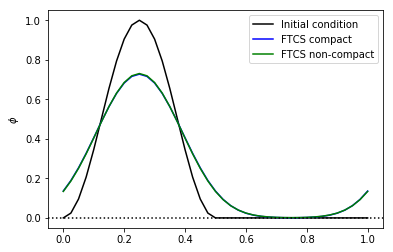

In [109]:
main()

In [13]:
# calculate the diffusion term using j+1 and j-1 terms
def FTCS_compact(eta, nx, nt, ini):
    #initial phi
    phi = ini
    phiNew = ini.copy()
    phiOld = ini.copy()

    # FTCS for the first time-step, looping over space

    # apply periodic boundary conditions
    phi[0] = phiOld[0] +  eta*(phiOld[1] - 2*phiOld[0] + phiOld[nx-1])
    phi[nx] = phi[0]

    # Loop over remaining time-steps (nt) using FTCS
    for n in range(0,nt):
        # loop over space
        for j in range(1,nx):
            phiNew[j] = phiOld[j] + eta*(phiOld[j+1] - 2*phiOld[j] + phiOld[j-1])
        # apply periodic boundary conditions
        phiNew[0] = phiOld[0] + eta*(phiOld[1] - 2*phiOld[0] + phiOld[nx-1])
        phiNew[nx] = phiNew[0]
        #update phi for the next time-step
        phiOld = phi.copy()
        phi = phiNew.copy()

    return phi#New

In [15]:
# calculate the diffusion term using the Crank-Nicholson method
# involves calculating a tridiagonal matrix
def Crank_Nicolson_method(eta, nx, nt, ini):
    # Spatial variable going from zero to one inclusive
    x = np.linspace(0.0, 1.0, nx+1)
    # Three time levels of the dependent variable, phi
    # need to create and solve a tridiagonal matrix
    # containing a combination of terms in 
    
    #create the tridiagonal matrix
    A = np.zeros((nx+1, nx+1))
    B = np.zeros((nx+1, nx+1))
    
    #set the values in the matrix across the diagonal
    mid_A = 2 + 2*eta #value across diagonal of matrix
    mid_B = 2 - 2*eta #value across diagonal of matrix    
    side = -eta
    for i in range(1,nx):
        A[i,i] = mid_A
        A[i,i+1] = side
        A[i,i-1] = side
        B[i,i+1] = -side
        B[i,i-1] = -side 
        A[i,i] = mid_B
        
    #set the values at the edge of the matrix
#     TDM[0,0] = mid
#     TDM[0,1] = side
#     TDM[1,0] = side
#     TDM[nx-1,nx-1] = mid
#     TDM[nx,nx-1] = side
#     TDM[nx-1,nx] = side
    
    phi = ini
    phiNew = ini.copy()
    phiOld = ini.copy()
    
    
#initial condition


##get this working!!

    u = initialBell(u)#np.asarray([2*xx if xx<=0.5 else 2*(1-xx) for xx in x])
    #evaluate right hand side at t=0
    bb = B.dot(u[1:-1]) #+ b

    #fig = plt.figure()
    plt.plot(x,u,linewidth=2)
    plt.show()

    #filename = 'foo000.jpg';
    #fig.set_tight_layout(True);
    #plt.xlabel("x")
    #plt.ylabel("u")
    #plt.title("t = 0")
    #plt.savefig(filename)
    #plt.clf()


    c = 0
    for j in range(nsteps):
        #print(j)
        #find solution inside domain
        u[1:-1] = np.linalg.solve(A,bb)
        #update right hand side
        bb = B.dot(u[1:-1]) #+ b    

    
    # apply periodic boundary conditions
    phi[0] = phiOld[0] +  (eta/4)*(phiOld[2] + phiOld[nx-2] - 2*phiOld[0])
    phi[1] = phiOld[1] +  (eta/4)*(phiOld[3] + phiOld[nx-1] - 2*phiOld[1])
    phi[nx-1] = phiOld[nx-1] +  (eta/4)*(phiOld[1] + phiOld[nx-3] - 2*phiOld[nx-1])
    phi[nx] = phi[0]

    d = B*phiOld
#     # Loop over remaining time-steps (nt) using CTCS
#     for n in range(1,nt):
#         phi
        
        
        
        
#         # loop over space
#         for j in range(1,nx):
#             phiNew[j] = phiOld[j] + (eta/4)*(phiOld[j+2] + phiOld[j-2] - 2*phiOld[j])
#         # apply periodic boundary conditions
#         phiNew[0] = phiOld[0] + (eta/4)*(phiOld[2] + phiOld[nx-2] - 2*phiOld[0])
#         phiNew[1] = phiOld[1] +  (eta/4)*(phiOld[3] + phiOld[nx-1] - 2*phiOld[1])
#         phiNew[nx-1] = phiOld[nx-1] +  (eta/4)*(phiOld[1] + phiOld[nx-3] - 2*phiOld[nx-1])
#         phiNew[nx] = phiNew[0]
#         #update phi for the next time-step
#         phiOld = phi.copy()
#         phi = phiNew.copy()

    return d, phi   
    
   

In [131]:
# Setup space, initial phi profile and Courant number
nx = 40                 # number of points in space
nt = 500                 # number of time steps
K = 0.01
K = 0.000020
hi_res_scale = 5# term to scale the higher resolution calculation used as the analytic solution    
eta = (K * nx**2) # dimensionless constant that sets the rate of diffusion
#print(f"eta_hi_res = {eta_hi_res}")

# Spatial variable going from zero to one inclusive
x = np.linspace(0.0, 1.0, nx+1)
x_hi_res = np.linspace(0.0, 1.0, nx*hi_res_scale+1, dtype=np.float64)
# Three time levels of the dependent variable, phi
phi = initialBell(x)

d,phi = Crank_Nicolson_method(eta, nx, nt, phi)


In [162]:
d

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   3.05572809e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   7.83095739e-04,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.91969252e-33],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [7]:
# Execute the code
main()

NameError: name 'FTCS_noncompact' is not defined

In [16]:
# calculate the diffusion term using j+2 and j-2 terms
def FTCS_noncompact(eta, nx, nt, ini):
    # Spatial variable going from zero to one inclusive
    x = np.linspace(0.0, 1.0, nx+1)
    # Three time levels of the dependent variable, phi
    phi = ini
    phiNew = ini.copy()
    phiOld = ini.copy()

    # FTCS for the first time-step, looping over space
    for j in range(1,nx-1):
        phi[j] = phiOld[j] + (eta/4)*(phiOld[j+2] + phiOld[j-2] - 2*phiOld[j])

    # apply periodic boundary conditions
    phi[0] = phiOld[0] +  (eta/4)*(phiOld[2] + phiOld[nx-2] - 2*phiOld[0])
    phi[1] = phiOld[1] +  (eta/4)*(phiOld[3] + phiOld[nx-1] - 2*phiOld[1])
    phi[nx-1] = phiOld[nx-1] +  (eta/4)*(phiOld[1] + phiOld[nx-3] - 2*phiOld[nx-1])
    phi[nx] = phi[0]

    # Loop over remaining time-steps (nt) using CTCS
    for n in range(1,nt):
        # loop over space
        for j in range(1,nx-1):
            phiNew[j] = phiOld[j] + (eta/4)*(phiOld[j+2] + phiOld[j-2] - 2*phiOld[j])
        # apply periodic boundary conditions
        phiNew[0] = phiOld[0] + (eta/4)*(phiOld[2] + phiOld[nx-2] - 2*phiOld[0])
        phiNew[1] = phiOld[1] +  (eta/4)*(phiOld[3] + phiOld[nx-1] - 2*phiOld[1])
        phiNew[nx-1] = phiOld[nx-1] +  (eta/4)*(phiOld[1] + phiOld[nx-3] - 2*phiOld[nx-1])
        phiNew[nx] = phiNew[0]
        #update phi for the next time-step
        phiOld = phi.copy()
        phi = phiNew.copy()

    return phi

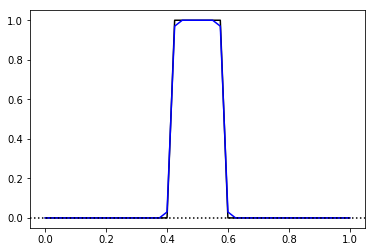

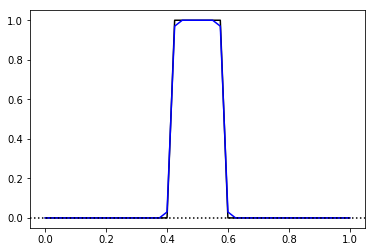

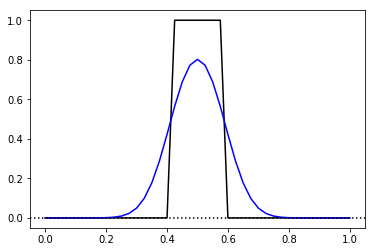

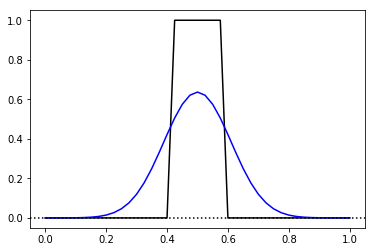

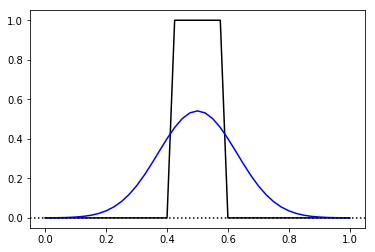

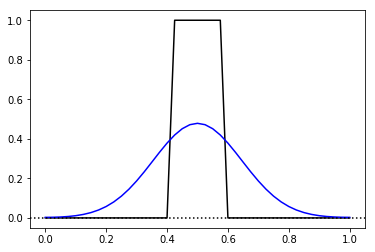

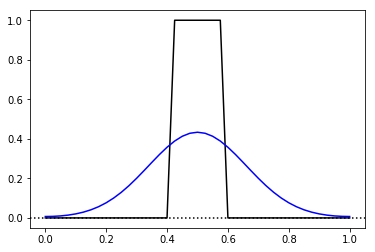

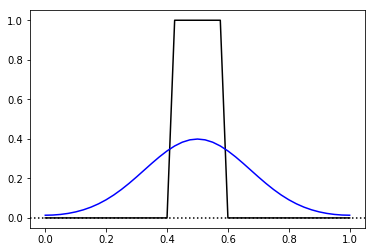

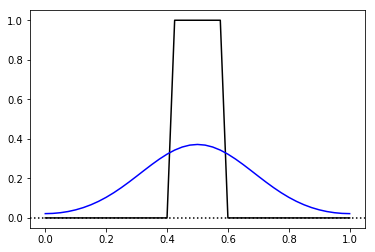

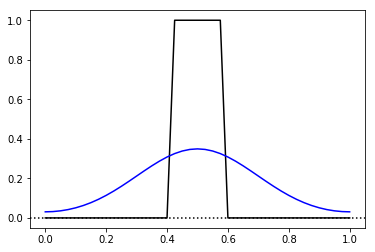

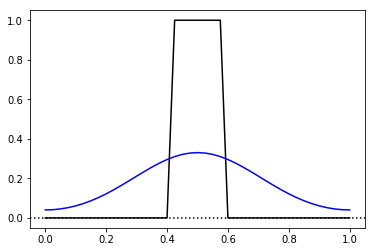

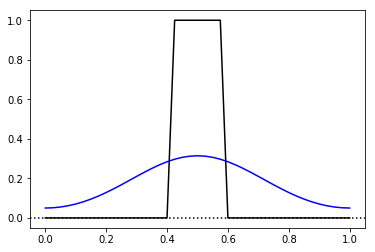

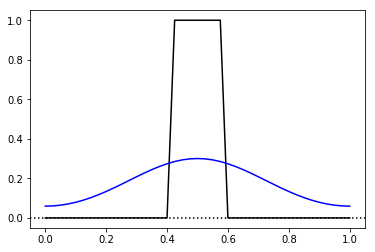

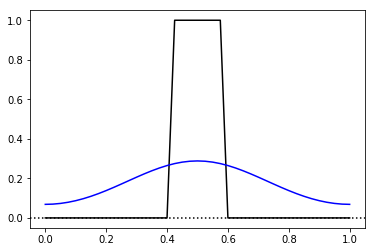

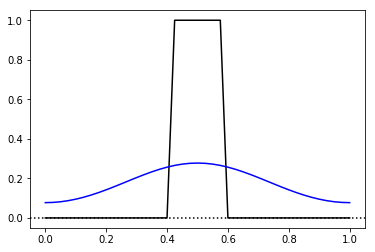

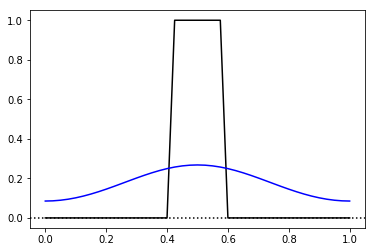

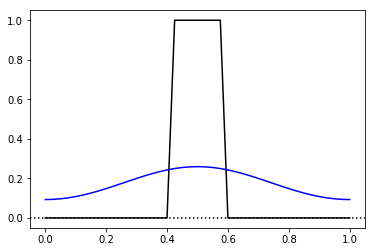

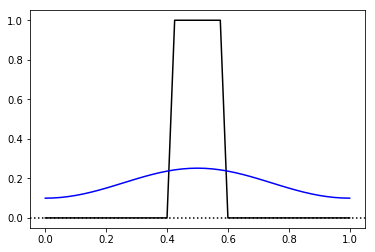

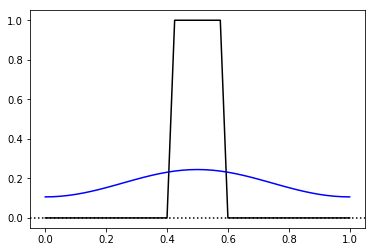

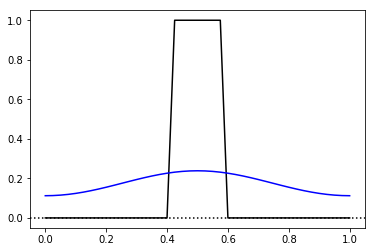

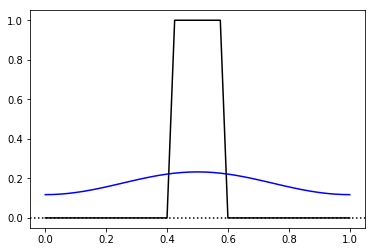

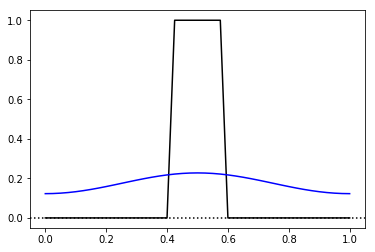

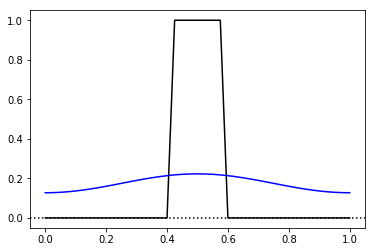

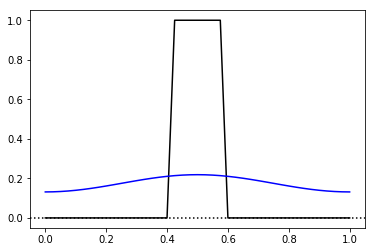

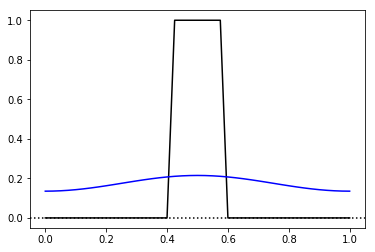

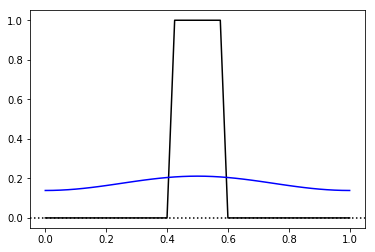

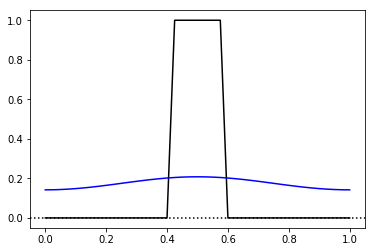

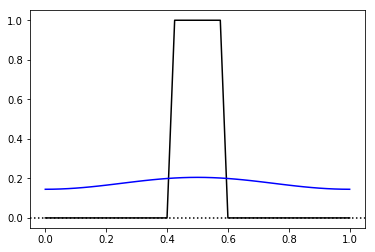

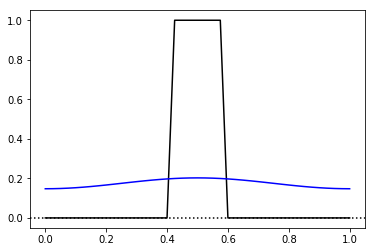

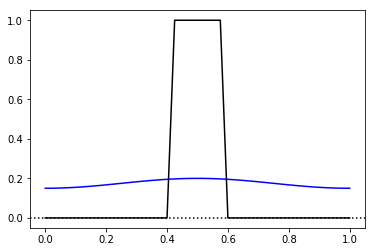

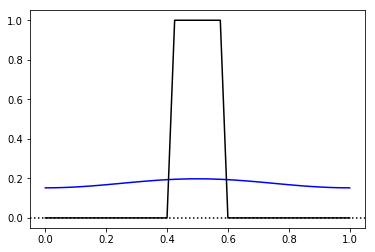

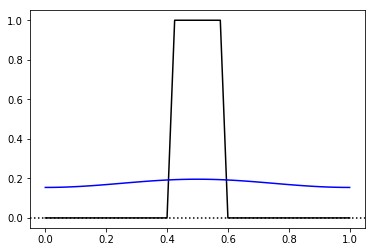

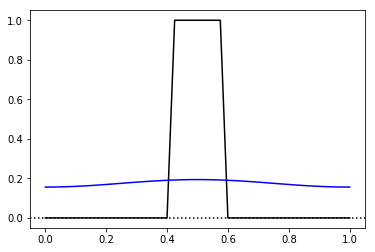

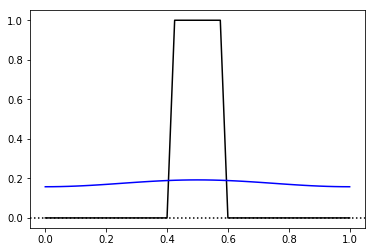

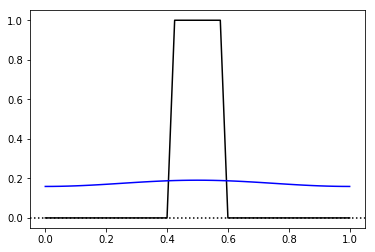

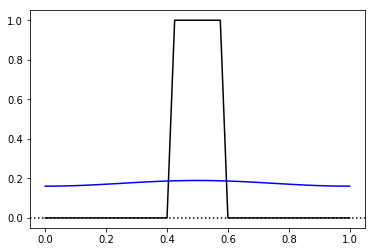

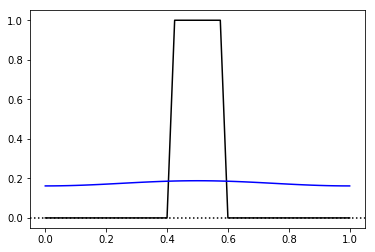

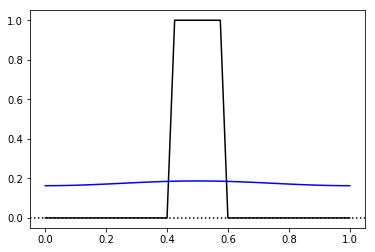

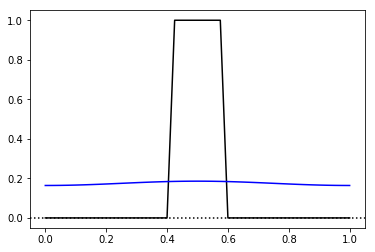

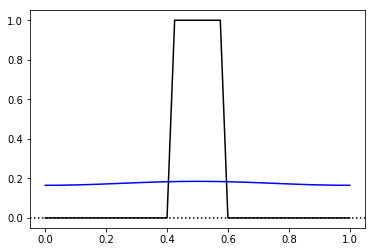

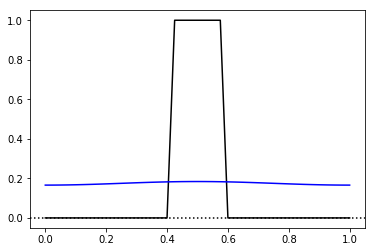

In [17]:
HTML(ani.to_html5_video())

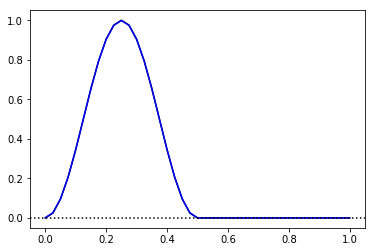

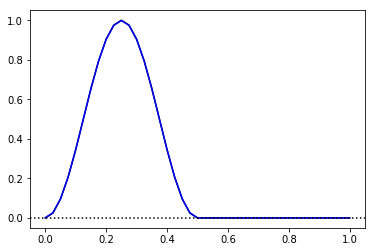

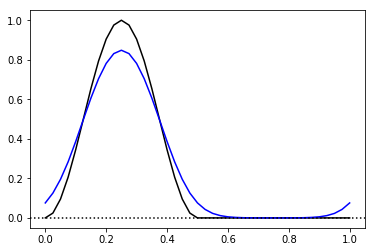

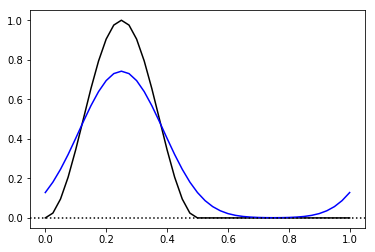

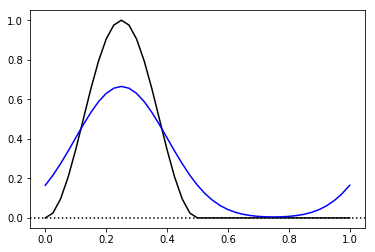

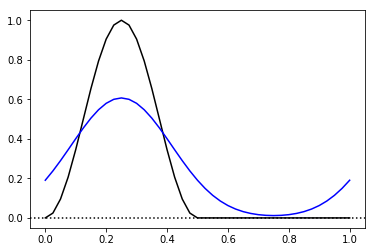

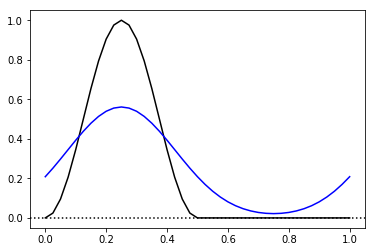

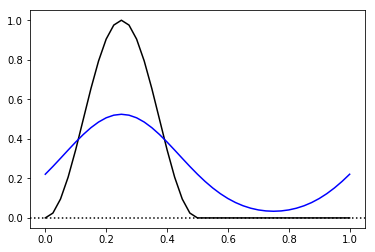

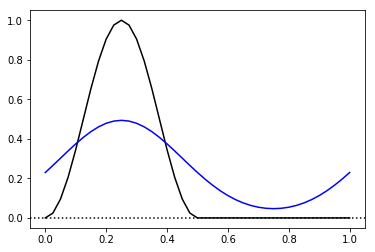

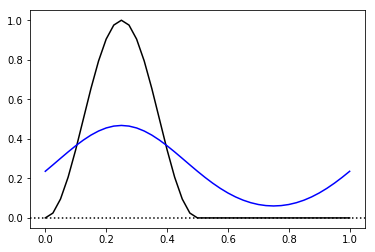

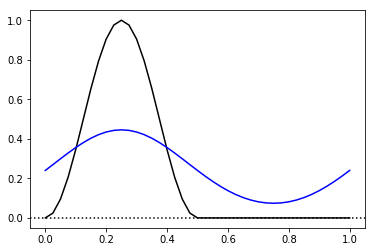

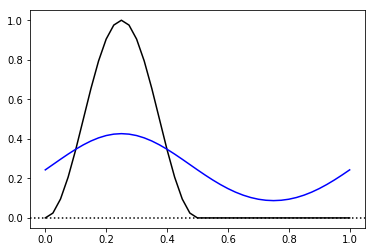

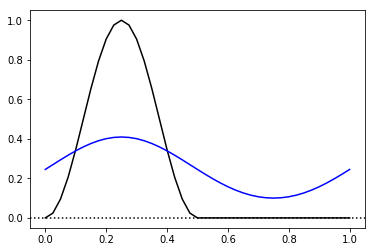

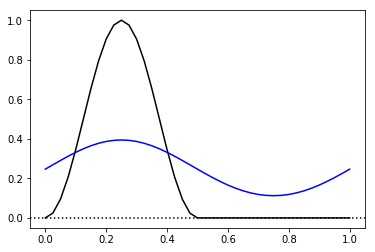

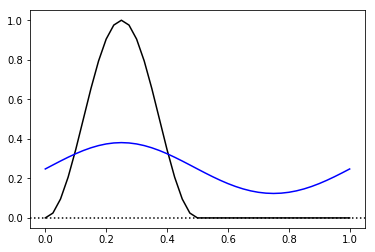

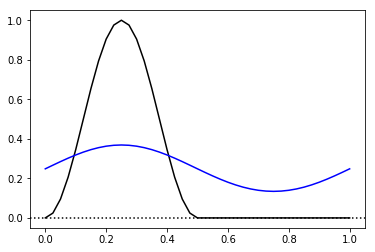

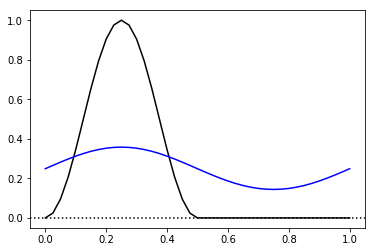

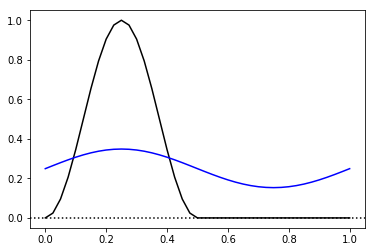

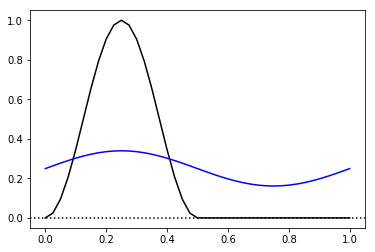

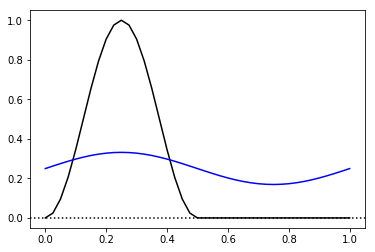

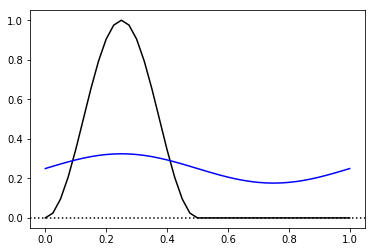

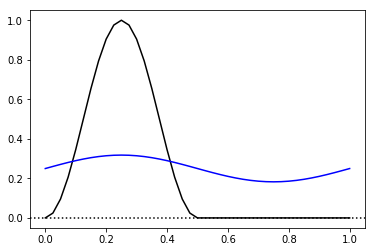

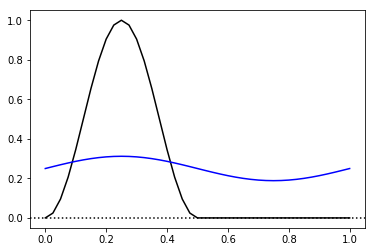

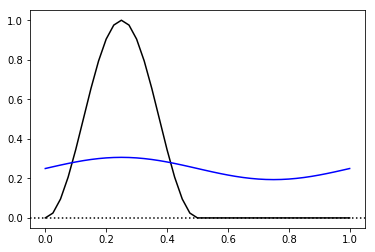

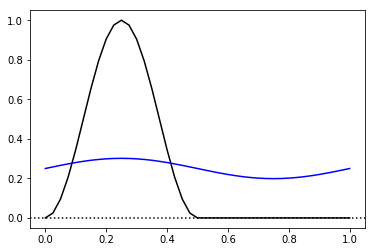

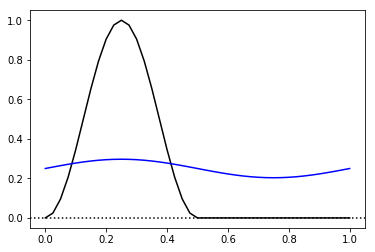

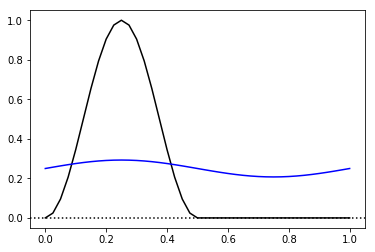

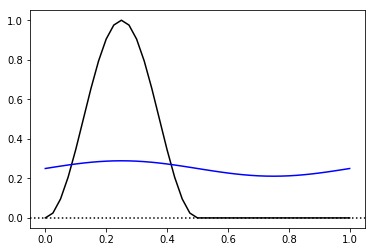

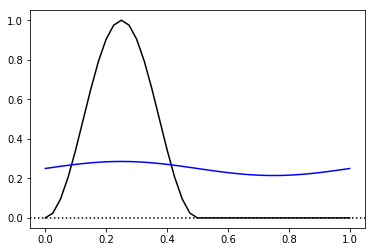

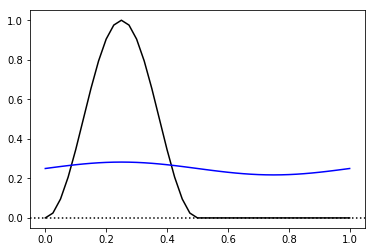

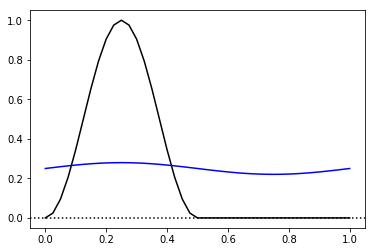

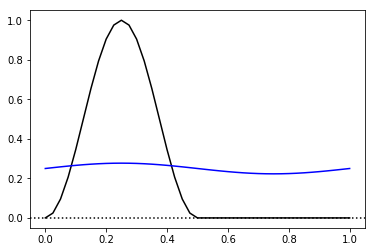

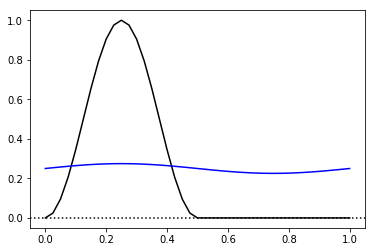

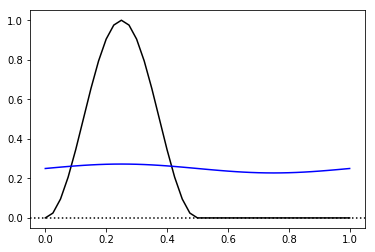

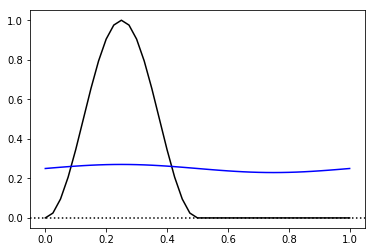

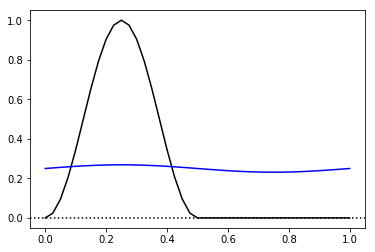

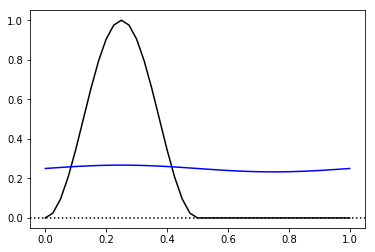

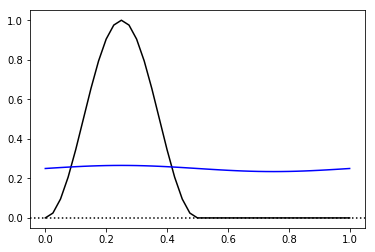

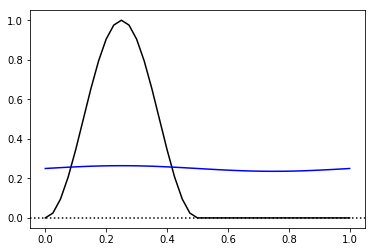

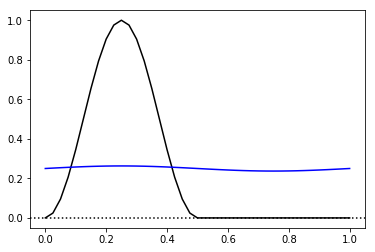

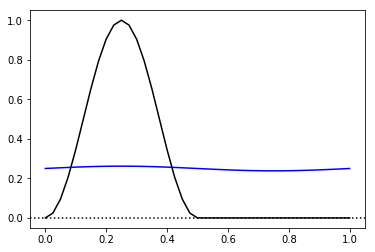

In [12]:
ani.save('diffusion-noncompact.mp4', dpi = 300 # so that the plots appear in the notebook)
         
         
         